# Primeira Análise Exploratória de Dados e Preparação de Dados

Principais atividades neste notebook:
1. Aquisição dos dados.
2. Análise exploratória inicial.
   1. Conhecer a base de dados.
   2. Identificação de problemas na base.
3. Ajustes na base de dados.
    1. Ajustar os problemas identificados na base.
    2. Preparação dos dados para modelagem.
    3. Seleção dos dados de interesse.
4. Análise exploratória após ajustes na base.

# Carregando a primeira base de dados 
Base de dados do UCI Machine Learning Repository.

**Bank Marketing Data Set**: Base de dados de uma campanha de um banco, para a venda de um produto financeiro.

Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Vamos entender um pouco melhor cada um dos campos da base de dados.

Informações cadastrais
* __age__: [inteiro] Idade do cliente.
* __job__: [categórico] Ocupação do cliente.
* __marital__: [categórico] Estado civil do cliente.
* __education__: [categórico] Nível de escolaridade do cliente.
* __default__: [categórico] Se o cliente entrou em 'default', ou, dívida.
* __balance__: [inteiro]Balanço do cliente.
* __housing__: [categórico] Empréstimo residencial. (cliente possui).
* __loan__: [categórico] Empréstimo pessoal. (cliente possui).

Informações da campanha
* __contact__: [categórico] Tipo do contato da campanha.
* __day__: [inteiro] Dia do mês do contato.
* __month__: [inteiro] Mês do contato, em segundos.
* __duration__: [inteiro] Duração do contato.
* __campaign__: [inteiro] Quantidade de contatos feitos na campanha.
* __pdays__: [inteiro] Número de dias desde o último contato na campanha.
* __previous__: [inteiro] Quantidade de contatos feitos antes da campanha
* __poutcome__: [categórico] Resultado da campanha anterior.

Rótulo
* __y__: [categórico] Resultado de sucesso da campanha. Cliente autoriza o depósito.

In [1]:
import pandas as pd

In [2]:
dados_df = pd.read_csv('bank-full-aula.csv', delimiter=';')

#### Visão geral dos dados carregados no DataFrame

In [3]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


#### Lista de colunas

In [4]:
list(dados_df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

#### Tipos das colunas (inicialmente inferido pelo Pandas)

In [5]:
dados_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

#### Primeiros elementos da base: .head()

In [6]:
dados_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


#### Elementos finais da base: .tail()

In [7]:
dados_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#### Amostra aleatória da base: sample()

In [8]:
dados_df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3903,56,retired,divorced,secondary,no,4166,yes,no,NaN,16,may,378,1,-1,0,NaN,no


## Análise exploratória inicial dos dados
Primeiros passos para análise exploratória dos dados.

### Exploração dos dados numéricos
Principais valores da estatística descritiva.

In [9]:
dados_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Explorando os campos com dados categóricos (object)

In [10]:
dados_df['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

Observe o valor nan ('_Not a Number_'). Valor ausente ou não reconhecido.

Apenas os valores nulos de 'education'

In [11]:
dados_df[dados_df['education'].isna() ]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
13,58,technician,married,NaN,no,71,yes,no,NaN,5,may,71,1,-1,0,NaN,no
16,45,admin.,single,NaN,no,13,yes,no,NaN,5,may,98,1,-1,0,NaN,no
42,60,blue-collar,married,NaN,no,104,yes,no,NaN,5,may,22,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,NaN,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,NaN,married,NaN,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,NaN,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,NaN,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


Quanto da base não tem 'education' definido? 

In [12]:
dados_df['education'].count()

43354

Avaliar a proporção com o total.

In [13]:
dados_df.shape

(45211, 17)

In [14]:
#quantidade de dados com 'education' ausente:
dados_df.shape[0] - dados_df['education'].count()

1857

In [15]:
# proporção de dados com 'education' ausente:
1 - (dados_df['education'].count() / dados_df.shape[0])

0.04107407489327819

In [16]:
dados_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [17]:
23202 + 13301 + 6851 + 1857 == 45211

True

#### Avaliando mais um pouco os outros campos categóricos

In [18]:
#Selecionar apenas os campos tipo 'object'
dados_df.select_dtypes(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,NaN,may,NaN,no
1,technician,single,secondary,no,yes,no,NaN,may,NaN,no
2,entrepreneur,married,secondary,no,yes,yes,NaN,may,NaN,no
3,blue-collar,married,NaN,no,yes,no,NaN,may,NaN,no
4,NaN,single,NaN,no,no,no,NaN,may,NaN,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,NaN,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,NaN,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,NaN,no


In [19]:
#Alternativamente, podemos excluir apenas os campos 'object'
dados_df.select_dtypes(exclude=['object'])

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [20]:
dados_df.select_dtypes(include=['object']).columns.values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'], dtype=object)

In [21]:
lista_colunas_categoricas = dados_df.select_dtypes(include=['object']).columns.values

In [22]:
lista_colunas_categoricas

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'], dtype=object)

In [23]:
for nome_coluna in lista_colunas_categoricas:
    print(f'Coluna {nome_coluna}:')
    print(dados_df[nome_coluna].unique())
    print(dados_df[nome_coluna].value_counts())
    print('')

Coluna job:
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

Coluna marital:
['married' 'single' 'divorced']
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Coluna education:
['tertiary' 'secondary' nan 'primary']
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

Coluna default:
['no' 'yes']
no     44396
yes      815
Name: default, dtype: int64

Coluna housing:
['yes' 'no']
yes    25130
no     20081
Name: housing, dtype: int64

Coluna loan:
['no' 'yes']
no     37967
yes     7244
Name: loan, dtype: int64

Coluna contact:
[nan 'cellular' 'telephone']
cellular   

#### Avaliando a coluna de rótulo: y

In [24]:
dados_df['y'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
dados_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Visualização de dados
Vamos aplicar algumas estratégias para visualização dos dados da base.

## Explorando os dados ausentes ('nan') com a biblioteca Missingno.

In [26]:
#!pip install missingno

In [27]:
import missingno as msno

In [28]:
%matplotlib inline

In [29]:
#relembrando o tamanho da base:
dados_df.shape

(45211, 17)

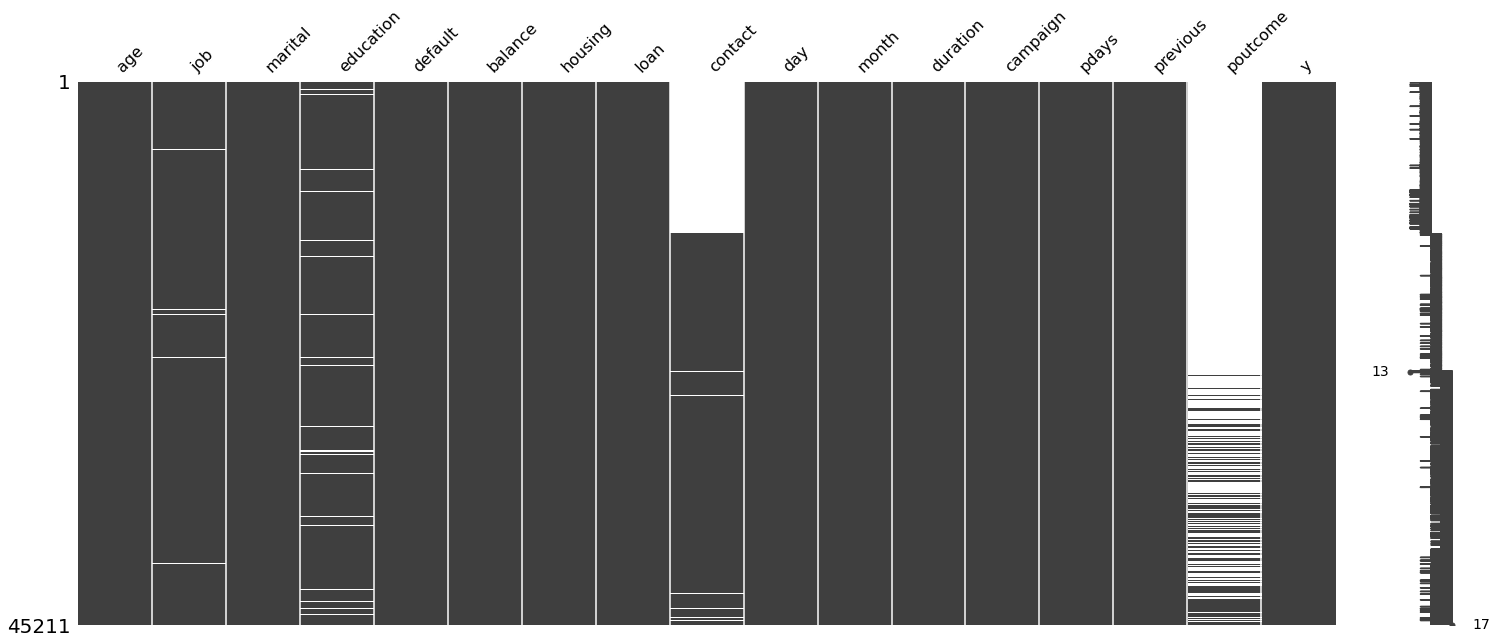

In [30]:
msno.matrix(dados_df)

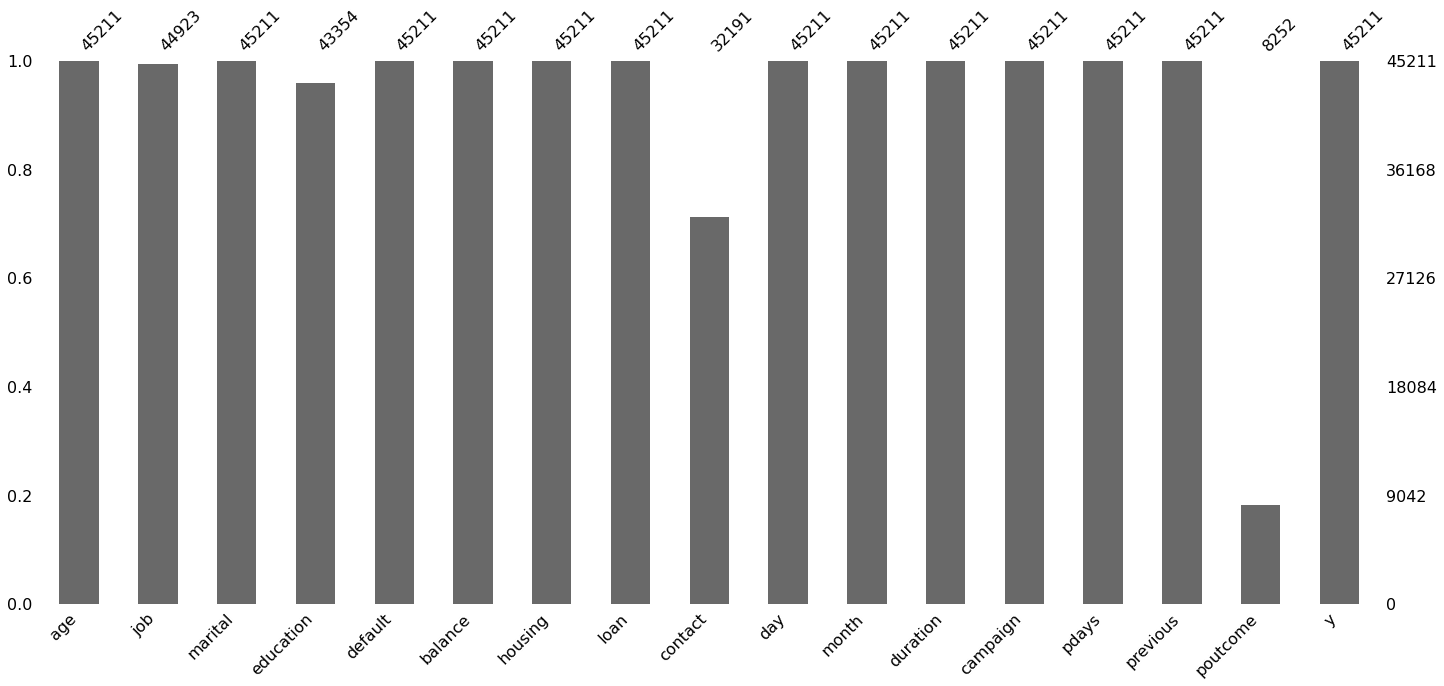

In [31]:
msno.bar(dados_df)

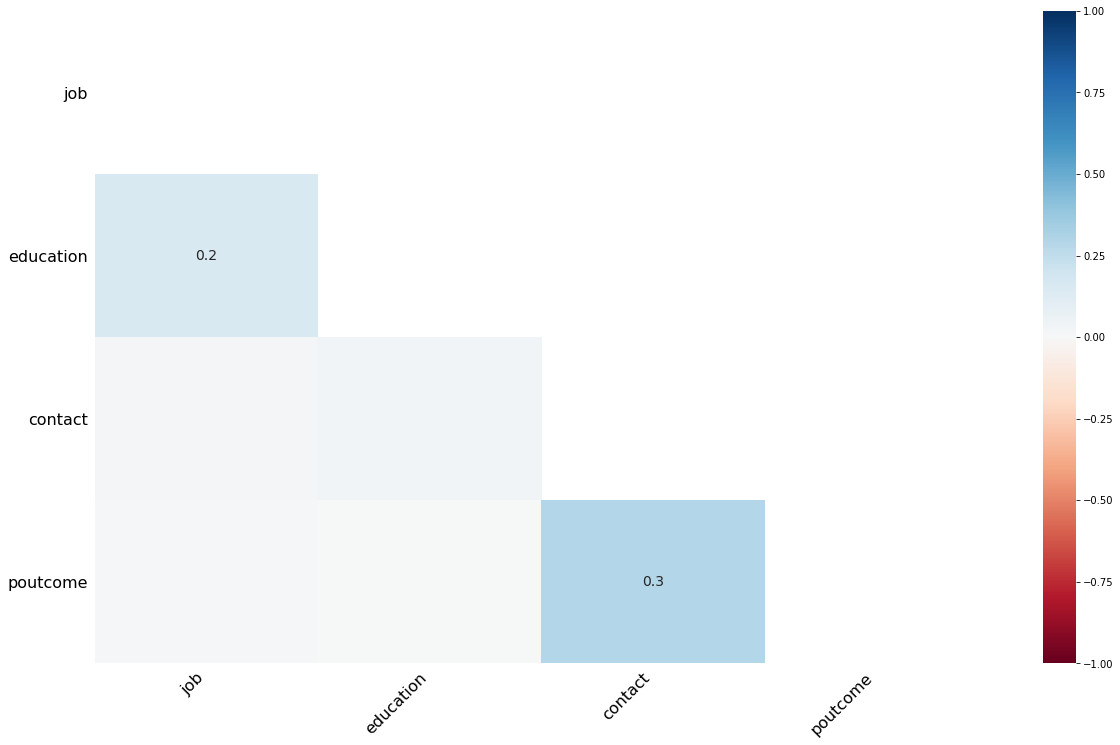

In [32]:
msno.heatmap(dados_df)

Valores são a correlação de nulidade:
* -1: Se a primeira(linha) variável é observada, a segunda(coluna) provavelmente não será observada.
* 0: Sem uma correlação clara. Indiferente.
* 1: Se a primeira variável é observada, a segunda provavelmente também será observada.

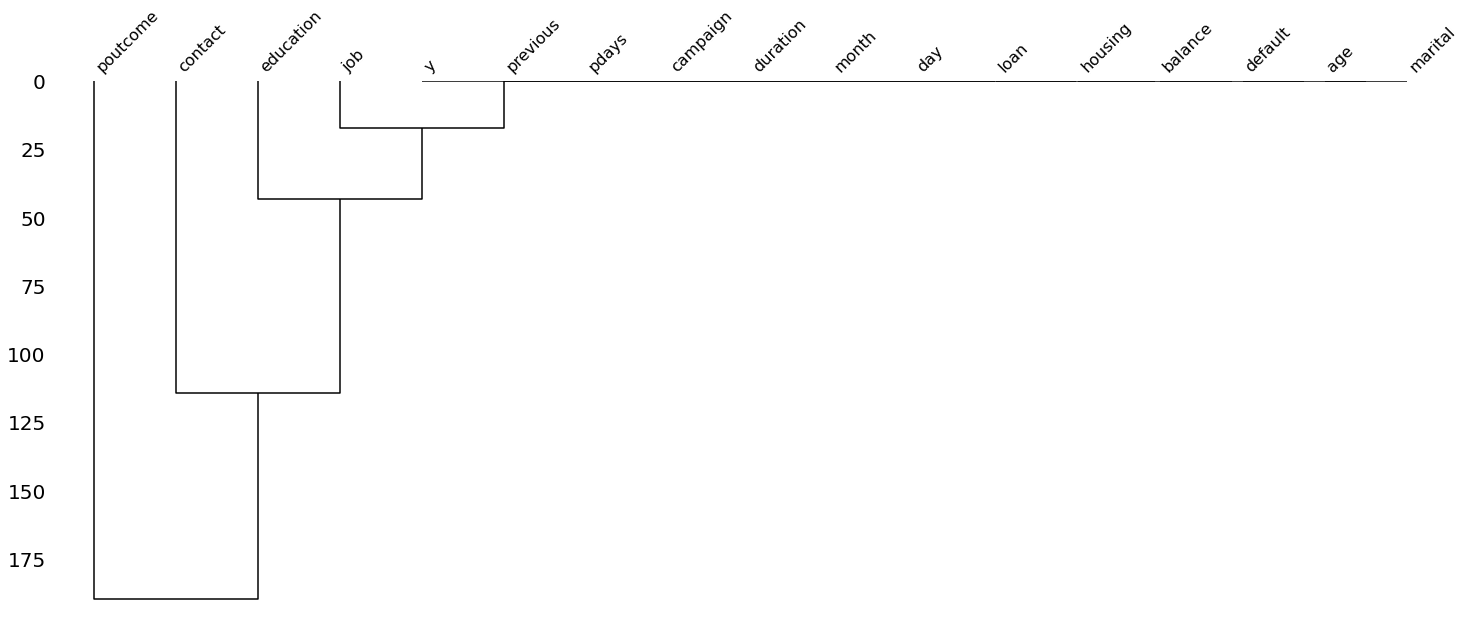

In [33]:
msno.dendrogram(dados_df)

### Resolvendo os dados ausentes

Neste momento identificamos a ocorrência em dados ausentes na base de dados. Vamos adotar algumas estratégias para ajustar os dados.

Olhando mais uma vez para o gráfico de barras de valores ausentes:

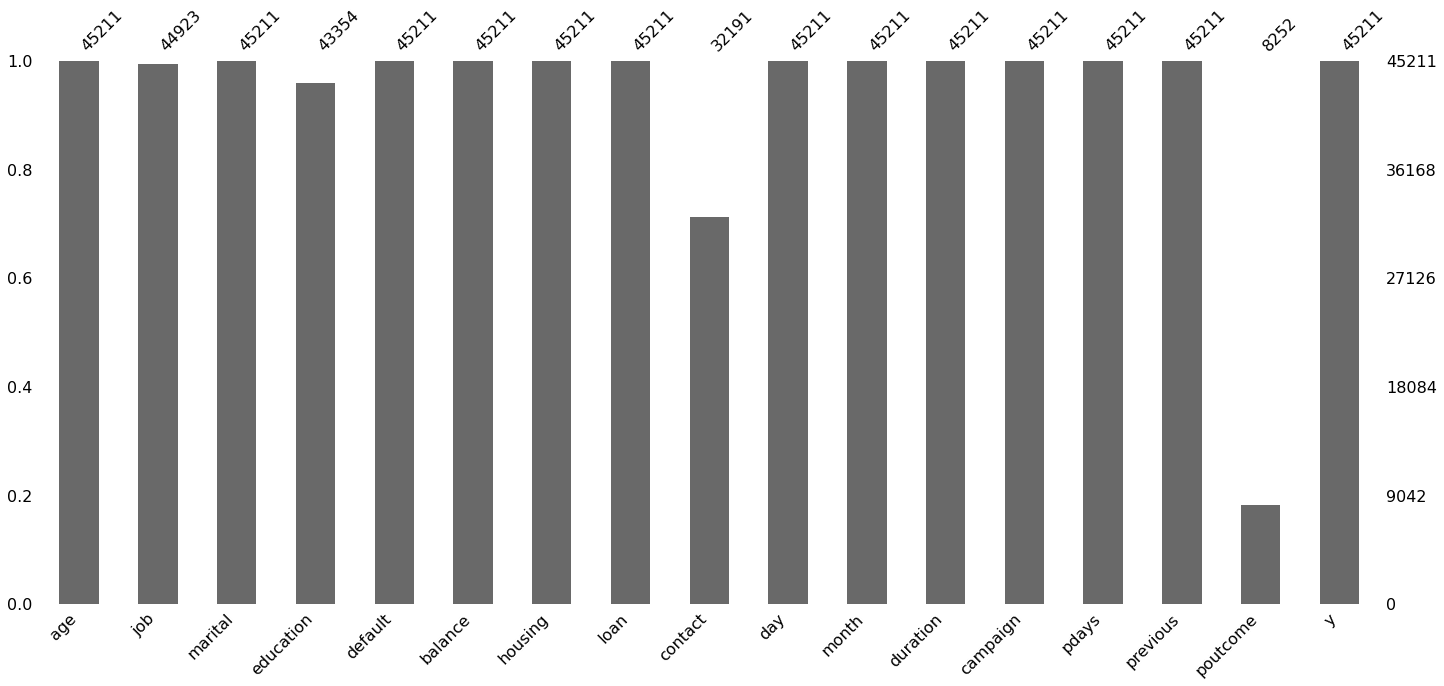

In [34]:
msno.bar(dados_df)

dados ausentes em: job, education, contact, poutcome
1. 'job' e 'education' estão presentes em mais de 95% da base: vamos apenas remover as linhas.
2. 'contact' está presente em 71.2% da base, vamos criar uma nova variável que indica o valor 'desconhecido'. Evitar perda de dados.
3. 'poutcome' está disponível em apenas 18.25% da base. Podemos desconsiderar a coluna ou criar uma nova variável. Para ilustrar, vamos desconsiderar a coluna.

#### 1. remover as linhas com valores ausentes

In [35]:
dados_df.dropna(axis=0, #linhas: 0, colunas: 1
               how='any', #critério any | all
               subset=['job', 'education'], #subconjunto, para axis=0: indicar lista de colunas 
               inplace=True) #modificar o DataFrame original

In [36]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [37]:
print(dados_df['job'].unique())
print(dados_df['education'].unique())

['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student']
['tertiary' 'secondary' 'primary']


#### 2. preencher os valores nan com um valor conhecido

In [38]:
dados_df['contact'].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [39]:
dados_df['contact'].value_counts()

cellular     28213
telephone     2694
Name: contact, dtype: int64

In [40]:
dados_df.fillna(value='desconhecido', axis=1, inplace=True)

In [41]:
dados_df['contact'].unique()

array(['desconhecido', 'cellular', 'telephone'], dtype=object)

In [42]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,desconhecido,5,may,261,1,-1,0,desconhecido,no
1,44,technician,single,secondary,no,29,yes,no,desconhecido,5,may,151,1,-1,0,desconhecido,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,desconhecido,5,may,76,1,-1,0,desconhecido,no
5,35,management,married,tertiary,no,231,yes,no,desconhecido,5,may,139,1,-1,0,desconhecido,no
6,28,management,single,tertiary,no,447,yes,yes,desconhecido,5,may,217,1,-1,0,desconhecido,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,desconhecido,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,desconhecido,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,desconhecido,no


#### 3. descartar a coluna
'poutcome' também foi preechido com o novo valor. Podemos manter ou descartar a coluna.

In [43]:
dados_df['poutcome'].value_counts()

desconhecido    35286
failure          4709
other            1774
success          1424
Name: poutcome, dtype: int64

In [44]:
dados_df.drop(axis=1, labels=['poutcome'], inplace=True)

In [45]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,desconhecido,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,desconhecido,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,desconhecido,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,desconhecido,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,desconhecido,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


## Exportando a distribuição dos dados
Vamos criar outros gráficos para a nossa análise exploratória, agora usando a biblioteca Seaborn.

In [46]:
#!pip install seaborn

In [47]:
import seaborn as sns

In [48]:
#lembrar do %matplotlib inline, mas neste notebook já foi chamado.
#%matplotlib inline

#### Gráfico de barra de contagem

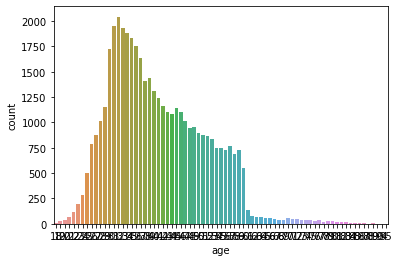

In [49]:
sns.countplot(x='age', data=dados_df)

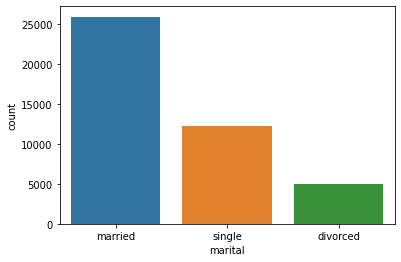

In [50]:
sns.countplot(x='marital', data=dados_df)

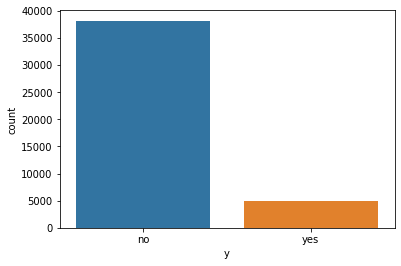

In [51]:
sns.countplot(x='y', data=dados_df)

#### Gráfico de barras

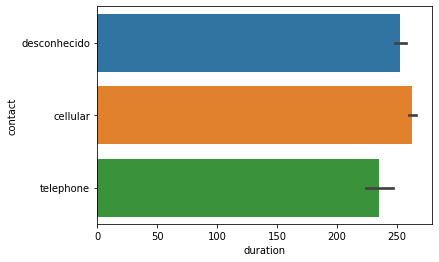

In [52]:
sns.barplot(x='duration', y='contact', data=dados_df)

#### Histogramas

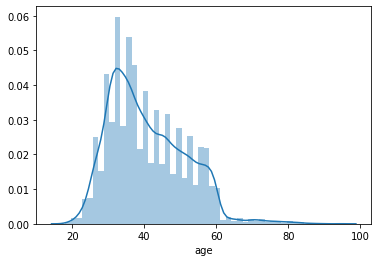

In [53]:
#Com Seaborn
sns.distplot(dados_df['age'])

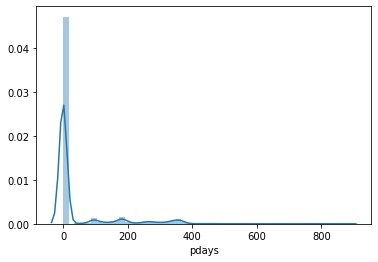

In [54]:
sns.distplot(dados_df['pdays'])

Problema identificado no pdays. Viés na distribuição.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17daccee10>]],
      dtype=object)

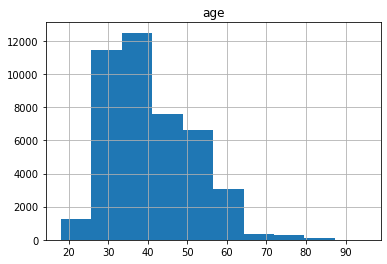

In [55]:
#Com Pandas
dados_df.hist(column='age')

#### boxplot

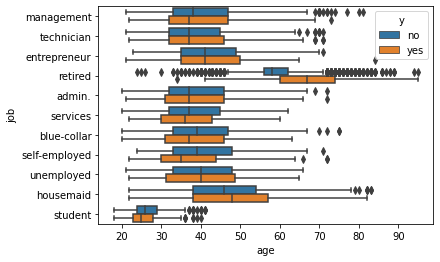

In [56]:
sns.boxplot(x='age', y='job', hue='y', data=dados_df)

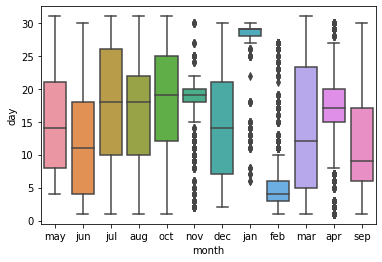

In [57]:
sns.boxplot(x='month', y='day', data=dados_df)

#### Gráficos de dispersão

In [58]:
dados_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

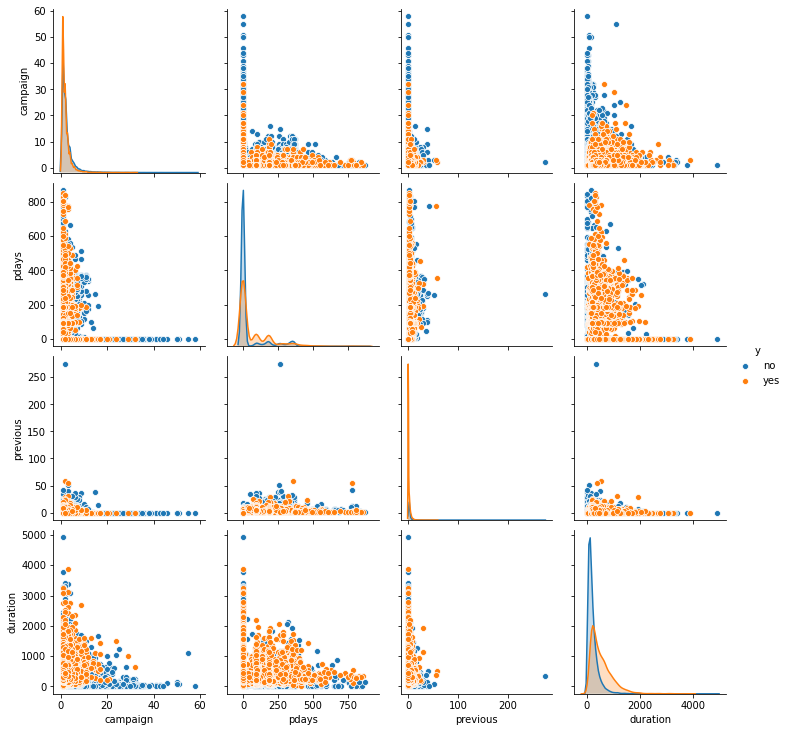

In [59]:
sns.pairplot(dados_df[['campaign','pdays','previous','duration','y']], hue='y')

## Realizando ajustes nos dados
Vamos realizar alguns ajustes nos dados e preparar a base para as etapas de modelagem.

In [60]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,desconhecido,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,desconhecido,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,desconhecido,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,desconhecido,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,desconhecido,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


### Remover as colunas 'day' e 'month'

In [61]:
dados_df.drop(axis=1, labels=['day', 'month'], inplace=True)

In [62]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,desconhecido,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,desconhecido,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,desconhecido,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,desconhecido,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,desconhecido,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,no


### Ajustar coluna 'pdays'

In [63]:
dados_df['pdays'].shape

(43193,)

In [64]:
dados_df[dados_df['pdays'] != -1].shape

(7912, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17da257588>]],
      dtype=object)

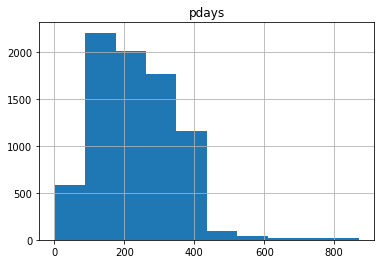

In [65]:
dados_df[dados_df['pdays'] != -1].hist('pdays')

In [66]:
#valores pdays em um vetor
valores_pdays = dados_df['pdays'].values

In [67]:
valores_pdays

array([ -1,  -1,  -1, ..., 184,  -1, 188])

In [68]:
#vetor que indica se o valor de pdays foi diferente de -1
valores_pday_dif_m_1 = valores_pdays != -1

In [69]:
valores_pday_dif_m_1

array([False, False, False, ...,  True, False,  True])

In [70]:
# atribuir zero para cada valor de pdays igual a -1
valores_pdays[valores_pdays == -1] = 0 

In [71]:
valores_pdays

array([  0,   0,   0, ..., 184,   0, 188])

In [72]:
#atualizar a coluna pdays do dataframe
dados_df['pdays'] = valores_pdays

In [73]:
#criar uma nova coluna indicando se o valor pdays estava disponível ou nao
dados_df['pdays_ok'] = valores_pday_dif_m_1

In [74]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,pdays_ok
0,58,management,married,tertiary,no,2143,yes,no,desconhecido,261,1,0,0,no,False
1,44,technician,single,secondary,no,29,yes,no,desconhecido,151,1,0,0,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,desconhecido,76,1,0,0,no,False
5,35,management,married,tertiary,no,231,yes,no,desconhecido,139,1,0,0,no,False
6,28,management,single,tertiary,no,447,yes,yes,desconhecido,217,1,0,0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,0,0,yes,False
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,0,0,yes,False
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,yes,True
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,0,0,no,False


### Ajustar categóricos binários para numéricos

In [75]:
for coluna in ['default', 'housing', 'loan', 'y']:
    print(coluna)
    print(dados_df[coluna].unique())

default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
y
['no' 'yes']


In [76]:
dados_df.replace(to_replace={'no': 0, 'yes': 1}, inplace=True)

In [77]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,pdays_ok
0,58,management,married,tertiary,0,2143,1,0,desconhecido,261,1,0,0,0,False
1,44,technician,single,secondary,0,29,1,0,desconhecido,151,1,0,0,0,False
2,33,entrepreneur,married,secondary,0,2,1,1,desconhecido,76,1,0,0,0,False
5,35,management,married,tertiary,0,231,1,0,desconhecido,139,1,0,0,0,False
6,28,management,single,tertiary,0,447,1,1,desconhecido,217,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,0,0,1,False
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,0,0,1,False
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,1,True
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,0,0,0,False


In [78]:
dados_df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
y             int64
pdays_ok       bool
dtype: object

#### Ajustando a coluna booleana

In [79]:
dados_df['pdays_ok'] = dados_df['pdays_ok'].astype(int)

In [80]:
dados_df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,pdays_ok
0,58,management,married,tertiary,0,2143,1,0,desconhecido,261,1,0,0,0,0
1,44,technician,single,secondary,0,29,1,0,desconhecido,151,1,0,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,desconhecido,76,1,0,0,0,0
5,35,management,married,tertiary,0,231,1,0,desconhecido,139,1,0,0,0,0
6,28,management,single,tertiary,0,447,1,1,desconhecido,217,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,0,0,1,0
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,0,0,1,0
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,1,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,0,0,0,0


In [81]:
dados_df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
y             int64
pdays_ok      int64
dtype: object

### Ajustar categóricos para vetores

In [82]:
pd.get_dummies(dados_df)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
0,58,0,2143,1,0,261,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,44,0,29,1,0,151,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,33,0,2,1,1,76,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,35,0,231,1,0,139,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,28,0,447,1,1,217,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,0,0,1,...,0,0,1,0,0,0,1,1,0,0
45207,71,0,1729,0,0,456,2,0,0,1,...,0,1,0,0,1,0,0,1,0,0
45208,72,0,5715,0,0,1127,5,184,3,1,...,0,0,1,0,0,1,0,1,0,0
45209,57,0,668,0,0,508,4,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [83]:
dados_df = pd.get_dummies(dados_df)

In [84]:
dados_df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
0,58,0,2143,1,0,261,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,44,0,29,1,0,151,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,33,0,2,1,1,76,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,35,0,231,1,0,139,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,28,0,447,1,1,217,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,0,0,1,...,0,0,1,0,0,0,1,1,0,0
45207,71,0,1729,0,0,456,2,0,0,1,...,0,1,0,0,1,0,0,1,0,0
45208,72,0,5715,0,0,1127,5,184,3,1,...,0,0,1,0,0,1,0,1,0,0
45209,57,0,668,0,0,508,4,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [85]:
dados_df.dtypes

age                     int64
default                 int64
balance                 int64
housing                 int64
loan                    int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
y                       int64
pdays_ok                int64
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
contact_cellular        uint8
contact_desconhecido    uint8
contact_telephone       uint8
dtype: object

### Amostra balanceada de dados
Vimos que temos um desbalanceamento na base.

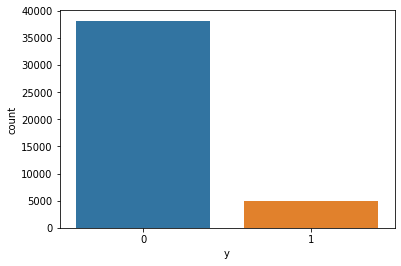

In [86]:
sns.countplot(x='y', data=dados_df)

In [87]:
dados_df[dados_df['y']==1]

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
83,59,0,2343,1,0,1042,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
86,56,0,45,0,0,1467,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
87,41,0,1270,1,0,1389,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
129,55,0,2476,1,0,579,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
168,54,0,184,0,0,673,2,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,0,2850,0,0,300,1,40,8,1,...,0,0,1,0,0,1,0,1,0,0
45205,25,0,505,0,1,386,2,0,0,1,...,0,0,0,1,0,1,0,1,0,0
45206,51,0,825,0,0,977,3,0,0,1,...,0,0,1,0,0,0,1,1,0,0
45207,71,0,1729,0,0,456,2,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [88]:
dados_df[dados_df['y']==0]

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
0,58,0,2143,1,0,261,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,44,0,29,1,0,151,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,33,0,2,1,1,76,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,35,0,231,1,0,139,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,28,0,447,1,1,217,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,0,138,1,1,162,2,187,5,0,...,0,0,1,0,0,0,1,1,0,0
45198,37,0,1428,0,0,333,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
45199,34,0,1475,1,0,1166,3,530,12,0,...,0,0,0,1,0,1,0,1,0,0
45209,57,0,668,0,0,508,4,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [89]:
dados_df[dados_df['y']==0].sample(5021)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
7471,29,0,0,1,0,106,4,0,0,0,...,0,0,0,1,0,1,0,0,1,0
16985,47,0,2793,1,0,102,4,0,0,0,...,0,0,1,0,1,0,0,0,0,1
28848,28,0,1285,0,0,199,2,2,17,0,...,0,0,0,1,0,1,0,0,0,1
22602,53,0,1,0,0,120,10,0,0,0,...,0,0,1,0,0,1,0,1,0,0
33666,34,0,305,1,0,212,2,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30757,59,0,1226,0,0,270,3,0,0,0,...,1,0,1,0,0,1,0,1,0,0
15429,53,0,530,0,1,744,4,0,0,0,...,0,0,0,1,0,1,0,0,0,1
19473,30,0,2283,0,0,74,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
32500,48,0,191,1,0,222,1,326,1,0,...,0,0,0,1,0,0,1,1,0,0


In [90]:
dados_df_balanceado = pd.concat([ dados_df[dados_df['y']==1] , dados_df[dados_df['y']==0].sample(5021) ])

In [91]:
dados_df_balanceado

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
83,59,0,2343,1,0,1042,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
86,56,0,45,0,0,1467,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
87,41,0,1270,1,0,1389,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
129,55,0,2476,1,0,579,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
168,54,0,184,0,0,673,2,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43170,60,0,211,0,0,480,2,189,1,0,...,0,0,1,0,1,0,0,1,0,0
34268,50,0,346,0,0,76,2,87,1,0,...,0,0,1,0,0,0,1,1,0,0
820,58,0,1109,1,1,180,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
25449,33,0,48,1,0,308,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0


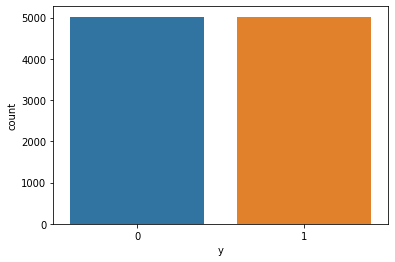

In [92]:
sns.countplot(x='y', data=dados_df_balanceado)

Para deixar nossas execuções mais rápidas, vamos trabalhar apenas com uma amostra da base.

In [93]:
dados_df_balanceado = dados_df_balanceado.sample(2000)

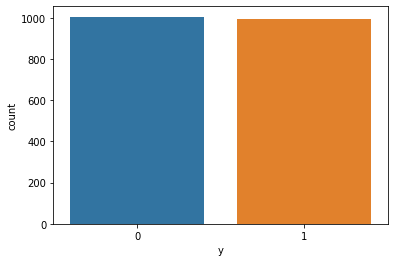

In [94]:
sns.countplot(x='y', data=dados_df_balanceado)

## Salvando arquivos 
Vamos salvar os dados tratados em arquivos para prosseguir com as etapas de modelagem. 
### Salvando o DataFrame em planilha

In [95]:
dados_df_balanceado.to_csv("dados_bank_tratados.csv", index=False, header=True)

In [96]:
!head dados_bank_tratados.csv

age,default,balance,housing,loan,duration,campaign,pdays,previous,y,pdays_ok,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
50,0,398,0,0,1567,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
34,0,869,0,0,89,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
48,0,96,1,0,255,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
55,0,1373,0,0,1087,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
30,0,631,1,0,174,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
29,0,1669,0,0,297,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0
53,0,57,0,1,84,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
37,0,775,0,0,150,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
42,0,214,0,0,127,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0


### Exportando Numpy arrays
Vamos salvar o conteúdo do DataFrame como Numpy arrays.

#### Recuperar apenas os dados (numpy.ndarray) do DataFrame.

#### Separando os rótulos

In [97]:
dados_df_balanceado.drop(axis=1, labels=['y'])

,age,default,balance,housing,loan,duration,campaign,pdays,previous,pdays_ok,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
18110,50,0,398,0,0,1567,5,0,0,0,...,0,0,1,0,0,0,1,0,0,1
41370,34,0,869,0,0,89,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1219,48,0,96,1,0,255,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1810,55,0,1373,0,0,1087,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
26005,30,0,631,1,0,174,2,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44204,43,0,0,0,0,745,1,281,1,1,...,1,0,1,0,0,0,1,1,0,0
25805,31,0,883,1,0,168,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
25076,38,0,3234,0,0,578,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
40766,71,0,10394,0,0,411,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [98]:
X = dados_df_balanceado.drop(axis=1, labels=['y']).values

In [99]:
X

array([[   50,     0,   398, ...,     0,     0,     1],
       [   34,     0,   869, ...,     1,     0,     0],
       [   48,     0,    96, ...,     0,     1,     0],
       ...,
       [   38,     0,  3234, ...,     1,     0,     0],
       [   71,     0, 10394, ...,     0,     0,     1],
       [   31,     0,  2544, ...,     1,     0,     0]])

In [100]:
X.shape

(2000, 30)

In [101]:
dados_df_balanceado['y'].values

array([0, 0, 0, ..., 1, 0, 1])

In [102]:
y = dados_df_balanceado['y'].values

In [103]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [104]:
y.shape

(2000,)

### Normalização dos dados
Note que os dados ainda variam em valores de intervalos diferentes.

In [107]:
dados_df_balanceado.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_desconhecido,contact_telephone
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,41.297000,0.015500,1596.254000,0.486500,0.135500,390.04750,2.521000,54.445000,0.835500,0.497000,...,0.037500,0.121500,0.56950,0.309000,0.14350,0.518500,0.338000,0.723500,0.21300,0.063500
std,12.146051,0.123561,3751.164664,0.499943,0.342342,363.25838,2.550845,111.860263,2.405272,0.500116,...,0.190031,0.326789,0.49527,0.462197,0.35067,0.499783,0.473147,0.447379,0.40953,0.243921
min,18.000000,0.000000,-4057.000000,0.000000,0.000000,5.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32.000000,0.000000,132.500000,0.000000,0.000000,145.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,38.000000,0.000000,541.500000,0.000000,0.000000,262.00000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,0.000000,1.000000,0.00000,0.000000
75%,49.000000,0.000000,1707.250000,1.000000,0.000000,527.25000,3.000000,60.250000,1.000000,1.000000,...,0.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,0.00000,0.000000
max,90.000000,1.000000,98417.000000,1.000000,1.000000,3076.00000,28.000000,838.000000,58.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


Precisamos fazer mais uma etapa de preparação dos dados para padronizar o intervalo das colunas. 

Mas faremos isso no próximo notebook.

### E finalmente, salvar os Numpy arrays...

In [108]:
import numpy as np

In [109]:
np.save('dados_X.npy', X)

In [110]:
np.save('dados_y.npy', y)

In [111]:
!ls

1 Conhecendo o NumPy.ipynb			  bank-full-aula.csv
2 Conhecendo o Pandas.ipynb			  bank-full.csv
3 Análise Exploratória de Dados e DataPrep.ipynb  dados_bank_tratados.csv
4 Modelagem.ipynb				  dados_X.npy
alunos.csv					  dados_y.npy
